# Pandas Groupby


## Introduction

In this lab, you'll learn how to use the `.groupby()` method in Pandas to summarize datasets.

## Objectives
You will be able to: 

- Use groupby methods to aggregate different groups in a dataframe


## Using `.groupby()` 

Let's bring in the Titantic data set.

In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df = df.drop(columns=['Name','Ticket','Embarked', 'Cabin'])
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,0.0,3,male,22.0,1.0,0.0,7.2500
1,2.0,1.0,1,female,38.0,1.0,0.0,71.2833
2,3.0,1.0,3,female,26.0,0.0,0.0,7.9250
3,4.0,1.0,1,female,35.0,1.0,0.0,53.1000
4,5.0,0.0,3,male,35.0,0.0,0.0,8.0500


In [2]:
df.shape

(1209, 8)

In [7]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,539.117452,0.392887,29.731894,1.517783,1.273780,33.642139
std,312.812037,0.488594,16.070125,2.134134,1.839229,50.587044
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,252.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,638.000000,0.000000,27.000000,1.000000,0.000000,14.108300
75%,839.000000,1.000000,40.000000,2.000000,2.000000,34.654200
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1209 entries, 0 to 1390
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1209 non-null   float64
 1   Survived     1209 non-null   float64
 2   Pclass       1209 non-null   object 
 3   Sex          1209 non-null   object 
 4   Age          1209 non-null   float64
 5   SibSp        1209 non-null   float64
 6   Parch        1209 non-null   float64
 7   Fare         1209 non-null   float64
dtypes: float64(6), object(2)
memory usage: 85.0+ KB


**Observation**
* its noticed from the information that, Pclass column was in object format, it should be in int.
* also noted there were question marks in Pclass column. this needs cleaning. After assesing, i decided to drop the rows with question marks.

In [9]:
df['Pclass'].value_counts()

Pclass
3    531
1    276
2    266
?    136
Name: count, dtype: int64

In [10]:
df[df['Pclass'] =='?']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
25,26.0,1.0,?,female,38.0,1.0,5.0,31.3875
37,38.0,0.0,?,male,21.0,0.0,0.0,8.0500
61,62.0,1.0,?,female,38.0,0.0,0.0,80.0000
80,81.0,0.0,?,male,22.0,0.0,0.0,9.0000
119,120.0,0.0,?,female,2.0,4.0,2.0,31.2750
...,...,...,...,...,...,...,...,...
1378,839.0,1.0,?,female,18.0,8.0,2.0,17.8000
1386,839.0,0.0,?,male,47.0,0.0,4.0,12.8750
1388,839.0,0.0,?,male,47.0,8.0,4.0,7.0500
1389,839.0,1.0,?,male,48.0,1.0,0.0,8.6625


In [11]:
len(df[df['Pclass'] =='?'])/len(df['Pclass']) *100

11.248966087675766

In [14]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1386,839.0,0.0,?,"Rush, Mr. Alfred George John",male,47.0,0.0,4.0,113510,12.8750,B79,C
1387,839.0,1.0,2,"Skoog, Master. Harald",female,17.0,5.0,5.0,2671,17.4000,E49,NaN
1388,839.0,0.0,?,"Slocovski, Mr. Selman Francis",male,47.0,8.0,4.0,239854,7.0500,B49,NaN
1389,839.0,1.0,?,"Glynn, Miss. Mary Agatha",male,48.0,1.0,0.0,36866,8.6625,F G63,C


**Specific Objectives**
1. To find out the gender with the highest number of survived passengers

**Research question**
1. What is the gender with highest survivors?

In [16]:
survived = df[df['Survived'] == 1]
survived.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1.0         322
male    1.0         208
Name: count, dtype: int64

In [15]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1.0         322
        0.0         177
male    0.0         684
        1.0         208
Name: count, dtype: int64

**Observation**
. Female gender had the highest survivors with value of 322.

**Notes**
. Next, i plot a barchart of survived passengers.

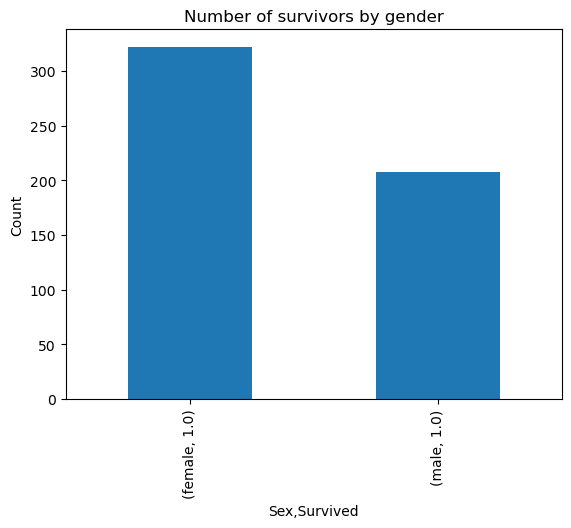

In [20]:
import matplotlib.pyplot as plt
#survived = df[df['Survived'] == 1]
survived.groupby('Sex')['Survived'].value_counts().plot(kind = 'bar')
plt.title('Number of survivors by gender')
plt.ylabel('Count');

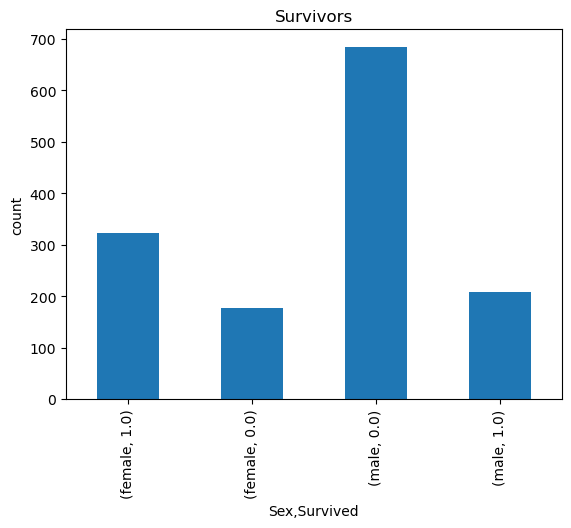

In [21]:
df.groupby('Sex')['Survived'].value_counts().plot(kind= 'bar')
plt.title('Survivors')
plt.ylabel('count');

During the Exploratory Data Analysis phase, one of the most common tasks you'll want to do is split the dataset into subgroups and compare them to see if you can notice any trends.  For instance, you may want to group the passengers together by gender or age. You can do this by using the `.groupby()` method built-in to pandas DataFrames. 

To group passengers by gender, you would type:

In [2]:
df.groupby('Sex')

In [3]:
# This line of code is equivalent to the one above
df.groupby(df['Sex'])

Note that this alone will not display a result -- although you have split the dataset into groups, you don't have a meaningful way to display information until you chain an **_Aggregation Function_** onto the groupby.  This allows you to compute summary statistics.

You can quickly use an aggregation function by chaining the call to the end of the `.groupby()` method.

In [4]:
df.groupby('Sex').sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Sex,,,,,,
female,267590.0,284.0,12812.85,838.0,765.0,19208.2047
male,384203.0,191.0,23133.01,997.0,775.0,21465.1410


In [22]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.922912
male      30.199752
Name: Age, dtype: float64

You can use aggregation functions to quickly help us compare subsets of our data.  For example, the aggregate statistics displayed above allow you to quickly notice that there were more female survivors overall than male survivors.

## Aggregation functions


There are many built-in aggregate methods provided for you in the `pandas` package, and you can even write and apply your own. Some of the most common aggregate methods you may want to use are:

* `.min()`: returns the minimum value for each column by group  
* `.max()`: returns the maximum value for each column by group  
* `.mean()`: returns the average value for each column by group  
* `.median()`: returns the median value for each column by group  
* `.count()`: returns the count of each column by group


You can also see a list of all of the built-in aggregation methods by creating a grouped object and then using tab completion to inspect the available methods:

In [5]:
grouped_df = df.groupby('Sex')

In [6]:
# For the following line of code, remove the `#` and then hit the tab after the period.
#grouped_df.

This is a comprehensive list of all built-in methods available to grouped objects. Note that some are aggregation methods, while others, such as `grouped.fillna()`, allow us to fill missing values to individual groups independently.  

### Multiple Aggregations

The `.groupby()` method in pandas can also run multiple different aggregations by utilizing `.agg()` instead of a single aggregation. A python dictionary can be passed into `.agg()` where the keys are the column names you want to aggregate and the values are the string representation of the exact aggregation method you want. 

In [23]:
df.groupby('Survived').agg({'PassengerId':'count',
                       'Sex':'count',
                       'Age':'mean'})

,PassengerId,Sex,Age
Survived,,,
0.0,861,861,29.925777
1.0,530,530,29.432295


**Observation**

* Total number who didn't survive was 861, those that survived were 530

In [24]:
df['Sex'].value_counts()

Sex
male      892
female    499
Name: count, dtype: int64

In [25]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0.0       male      684
          female    177
1.0       female    322
          male      208
Name: count, dtype: int64

In [7]:
df.groupby('Sex').agg({'PassengerId':'count',
                       'Survived':'sum',
                       'Age':'mean'})

,PassengerId,Survived,Age
Sex,,,
female,443,284.0,28.922912
male,766,191.0,30.199752


In the cell above we returned three different aggregations on three seperate columns. We counted up the number of individuals using `'PassengerId':'count'`. We looked at the number of people who survived via ``'Survived':'sum'`` and finally we also returned the mean age via ``'Age':'mean'``, all grouped by `Sex`.

## Multiple groups

You can also split data into multiple different levels of groups by passing in an array containing the name of every column you want to group by -- for instance, by every combination of both `Sex` and `Pclass`.   

In [8]:
df.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch       Fare
Sex    Pclass                                                                 
female 1        594.965812  0.811966  34.098291  1.521368  1.538462  84.552209
       2        602.647059  0.722689  26.338992  1.605042  1.596639  26.989777
       3        550.912162  0.466216  25.677973  1.858108  1.810811  21.144596
       ?        758.118644  0.576271  32.011356  3.288136  2.152542  50.413771
male   1        601.886792  0.415094  38.287799  1.440252  1.490566  56.046671
       2        587.170068  0.258503  31.630340  1.414966  1.122449  29.693905
       3        377.919060  0.151436  25.757624  0.973890  0.506527  15.446343
       ?        746.051948  0.376623  32.862597  2.428571  2.324675  29.516452

## Selecting information from grouped objects

Since the resulting object returned is a DataFrame, you can also slice a selection of columns you're interested in from the DataFrame returned. 

The example below demonstrates the syntax for returning the mean of the `Survived` class for every combination of `Sex` and `Pclass`:

In [9]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.811966
        2         0.722689
        3         0.466216
        ?         0.576271
male    1         0.415094
        2         0.258503
        3         0.151436
        ?         0.376623
Name: Survived, dtype: float64

The above example slices by column, but you can also slice by index. Take a look:

In [10]:
grouped = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
grouped['female']

Pclass
1    0.811966
2    0.722689
3    0.466216
?    0.576271
Name: Survived, dtype: float64

In [11]:
# Using string index label
grouped['female']['1']

0.811965811965812

In [12]:
# Same result as python 0 index
grouped['female'][0]

0.811965811965812

Note that you need to provide only the value `female` as the index, and are returned all the groups where the passenger is female, regardless of the `Pclass` value. The second example shows the results for female passengers with a 1st-class ticket.

## Summary

In this lab, you learned about how to split a DataFrame into subgroups using the `.groupby()` method. You also learned to generate aggregate views of these groups by applying built-in methods to a groupby object.